In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = './data_a/'
bit_rate1 = pd.read_csv(file_path+'bit_rate1.csv')
bit_rate2 = pd.read_csv(file_path+'bit_rate2.csv')
print(bit_rate1.head())
data_bit_rate = [bit_rate1,bit_rate2]

   bitrate
0        0
1        2
2        2
3        2
4        2


network 0 average_bit_rate : 1.8608391608391608
network 1 average_bit_rate : 1.8731501057082451


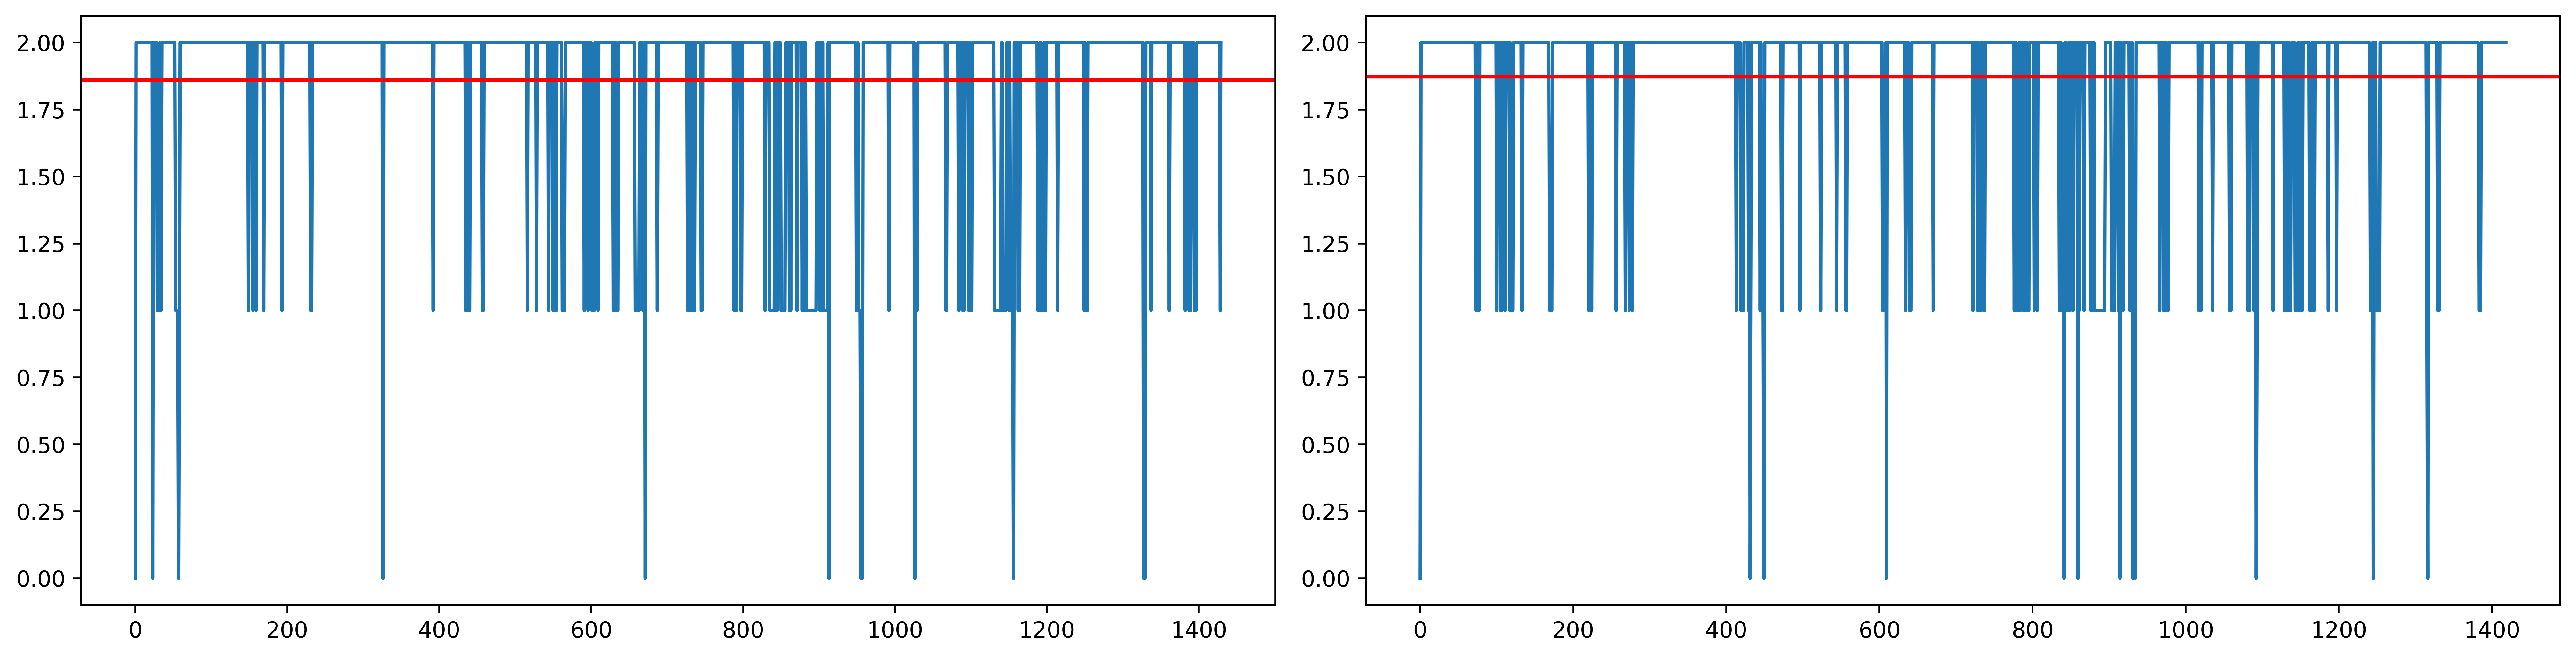

In [3]:
fig  = plt.figure(dpi=500, figsize=(16,4), constrained_layout=True)
for i in range(len(data_bit_rate)):
       ax = fig.add_subplot(1,2,i+1)
       data = data_bit_rate[i]
       print('network',i,'average_bit_rate :',np.average(data['bitrate']))
       ax.plot(data)
       ax.axhline(np.average(data['bitrate']),color = 'red')
plt.show()

percentage_bitrate_network 0
bitrate
0            12
1           175
2          1243
dtype: int64
percentage_bitrate_network 1
bitrate
0            12
1           156
2          1251
dtype: int64


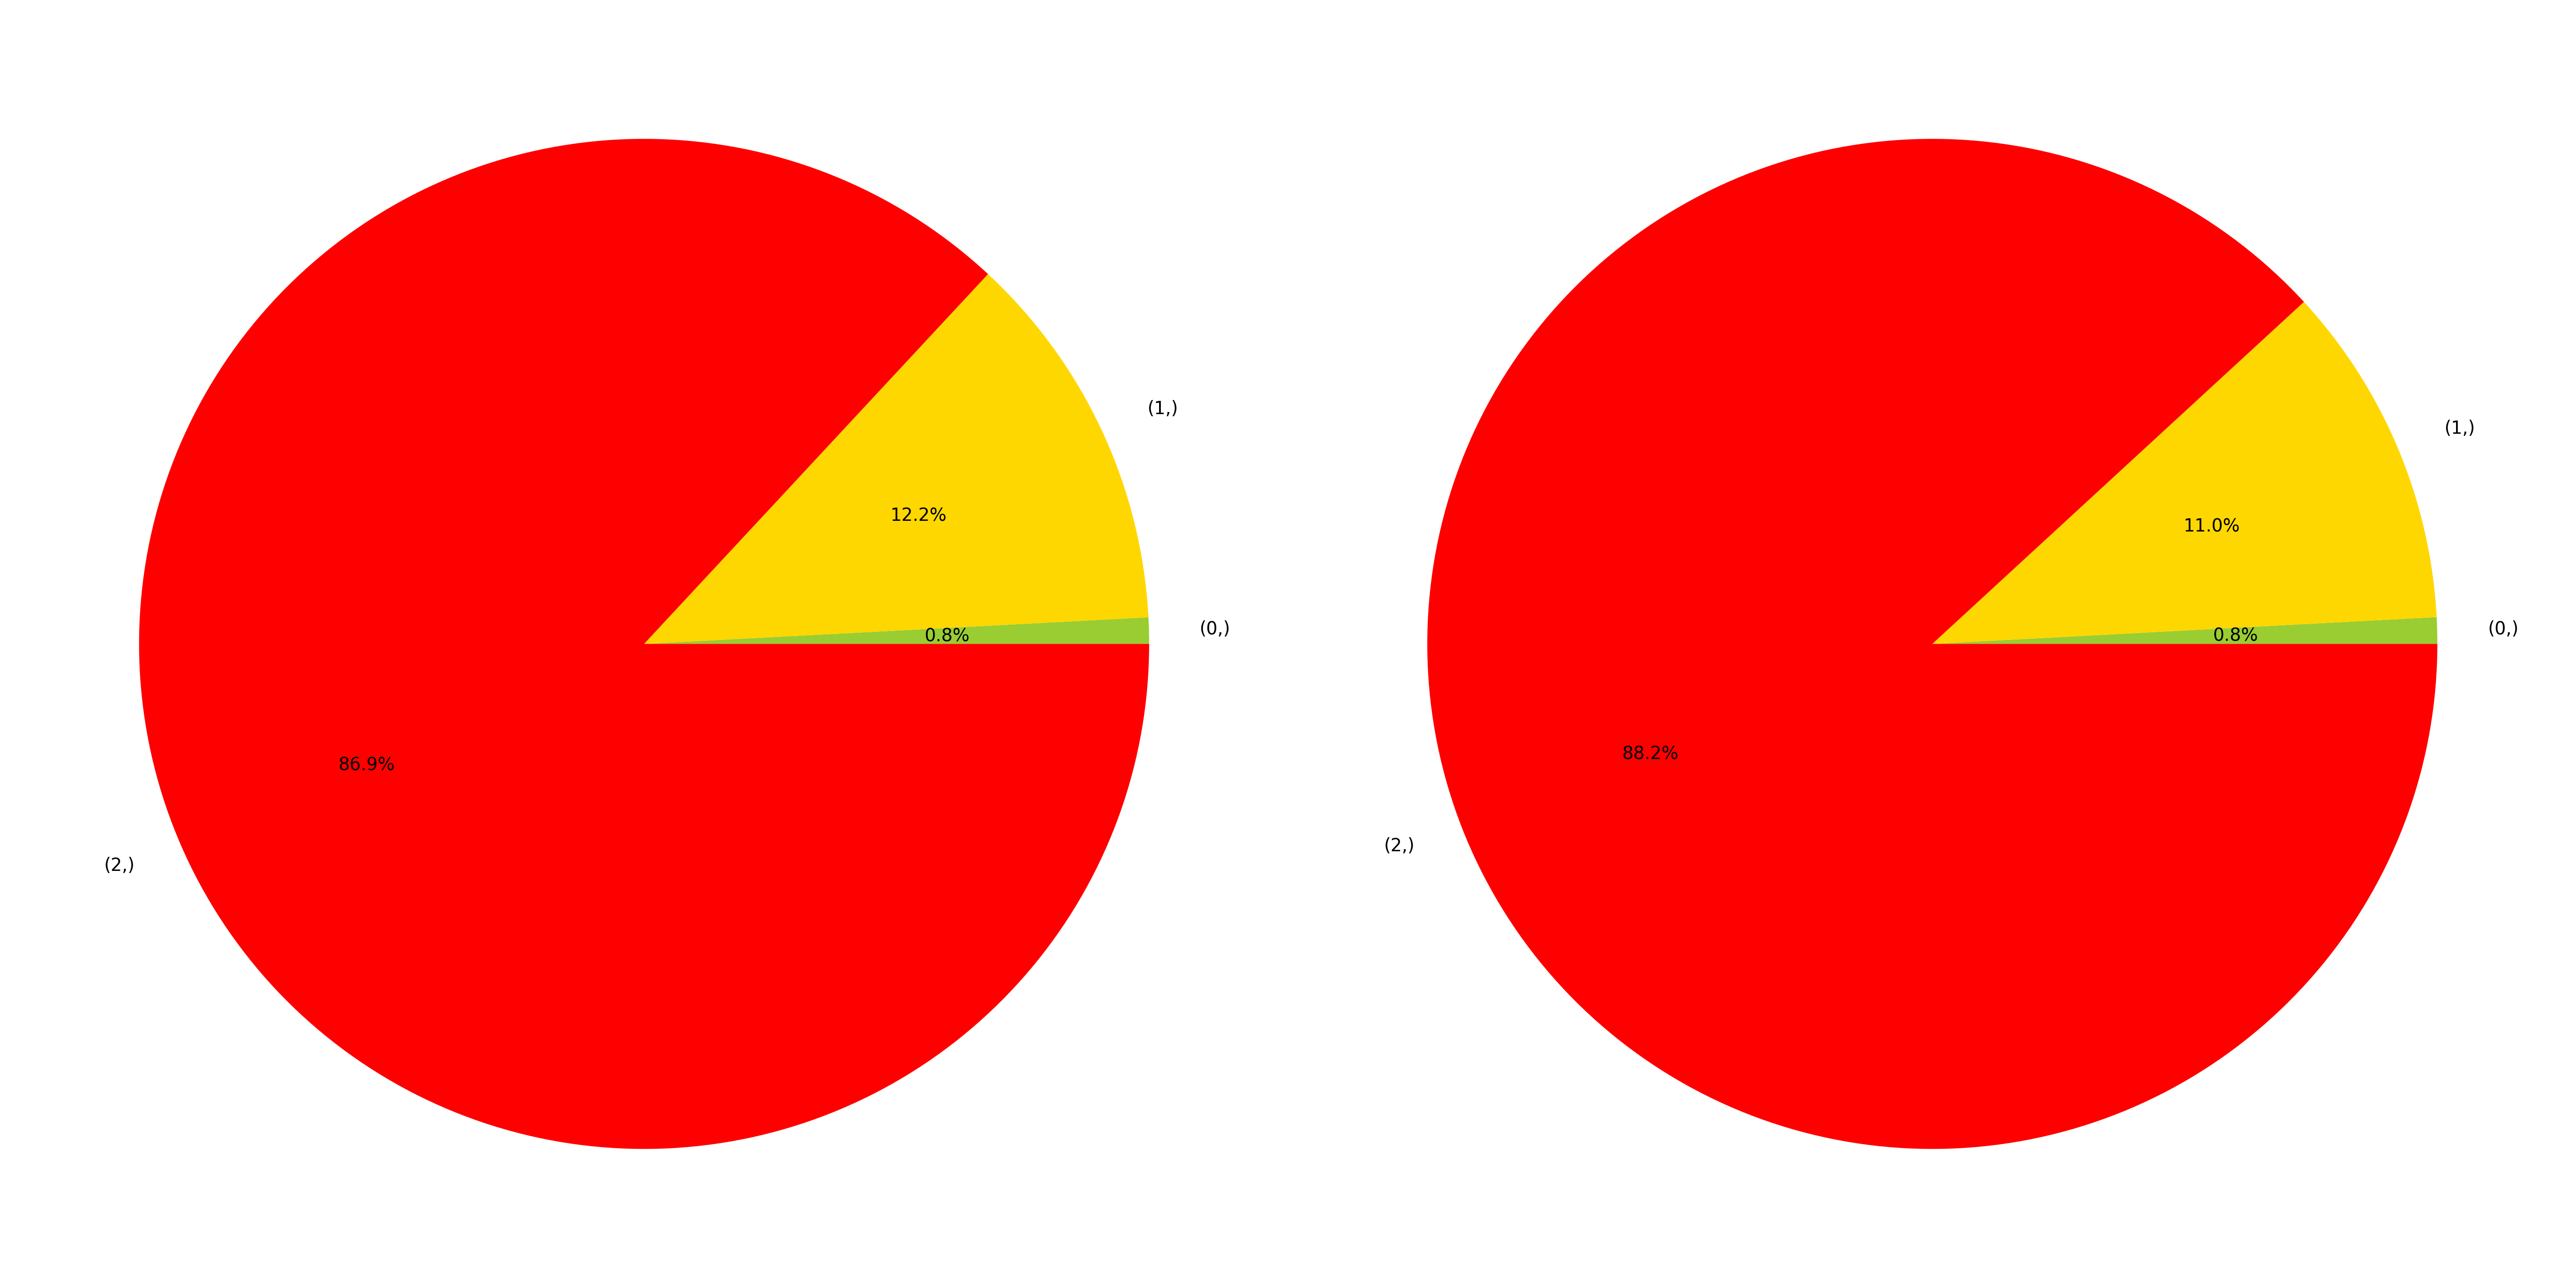

In [4]:
for i in range(len(data_bit_rate)):
       data_bit_rate[i] = data_bit_rate[i].value_counts().sort_index()
       print('percentage_bitrate_network',i)
       print(data_bit_rate[i])

fig  = plt.figure(dpi=300, figsize=(20, 12), constrained_layout=True)
for i in range(len(data_bit_rate)):
       ax = fig.add_subplot(1,2,i+1)
       data = data_bit_rate[i]
       labels = data.keys()
       colors = ['yellowgreen','gold','#FF0000','lightcoral']
       ax.pie(data,labels=labels, colors=colors,
              autopct='%1.1f%%')
plt.show()

In [5]:
delay1 = pd.read_csv(file_path+'delay1.csv')
delay2 = pd.read_csv(file_path+'delay2.csv')
data_delay = [delay1,delay2]

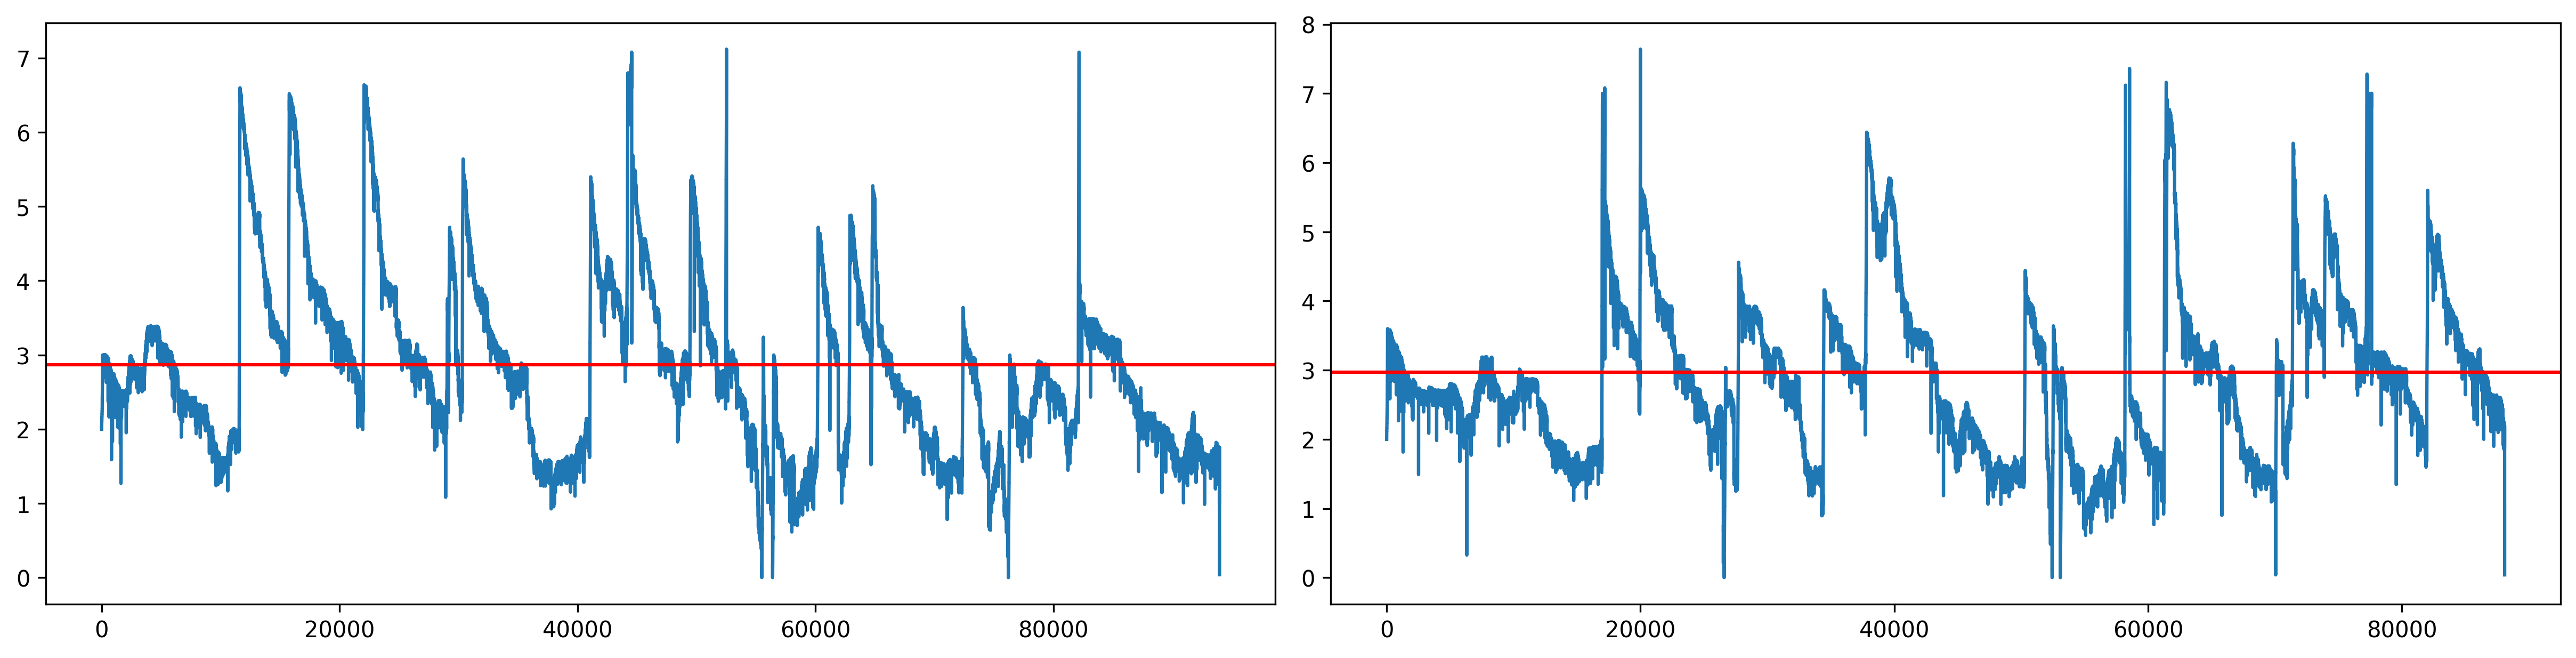

In [6]:
fig  = plt.figure(dpi=300, figsize=(16, 4), constrained_layout=True)
for i in range(len(data_delay)):
       ax = fig.add_subplot(1,2,i+1)
       data = data_delay[i]
       ax.plot(data)
       ax.axhline(np.average(data['delay']),color = 'red')
plt.show()

network 0 delay_count
0    24613
1    55839
2    11694
3     1821
Name: delay, dtype: int64
network 1 delay_count
0    19343
1    56367
2    11043
3     1344
Name: delay, dtype: int64


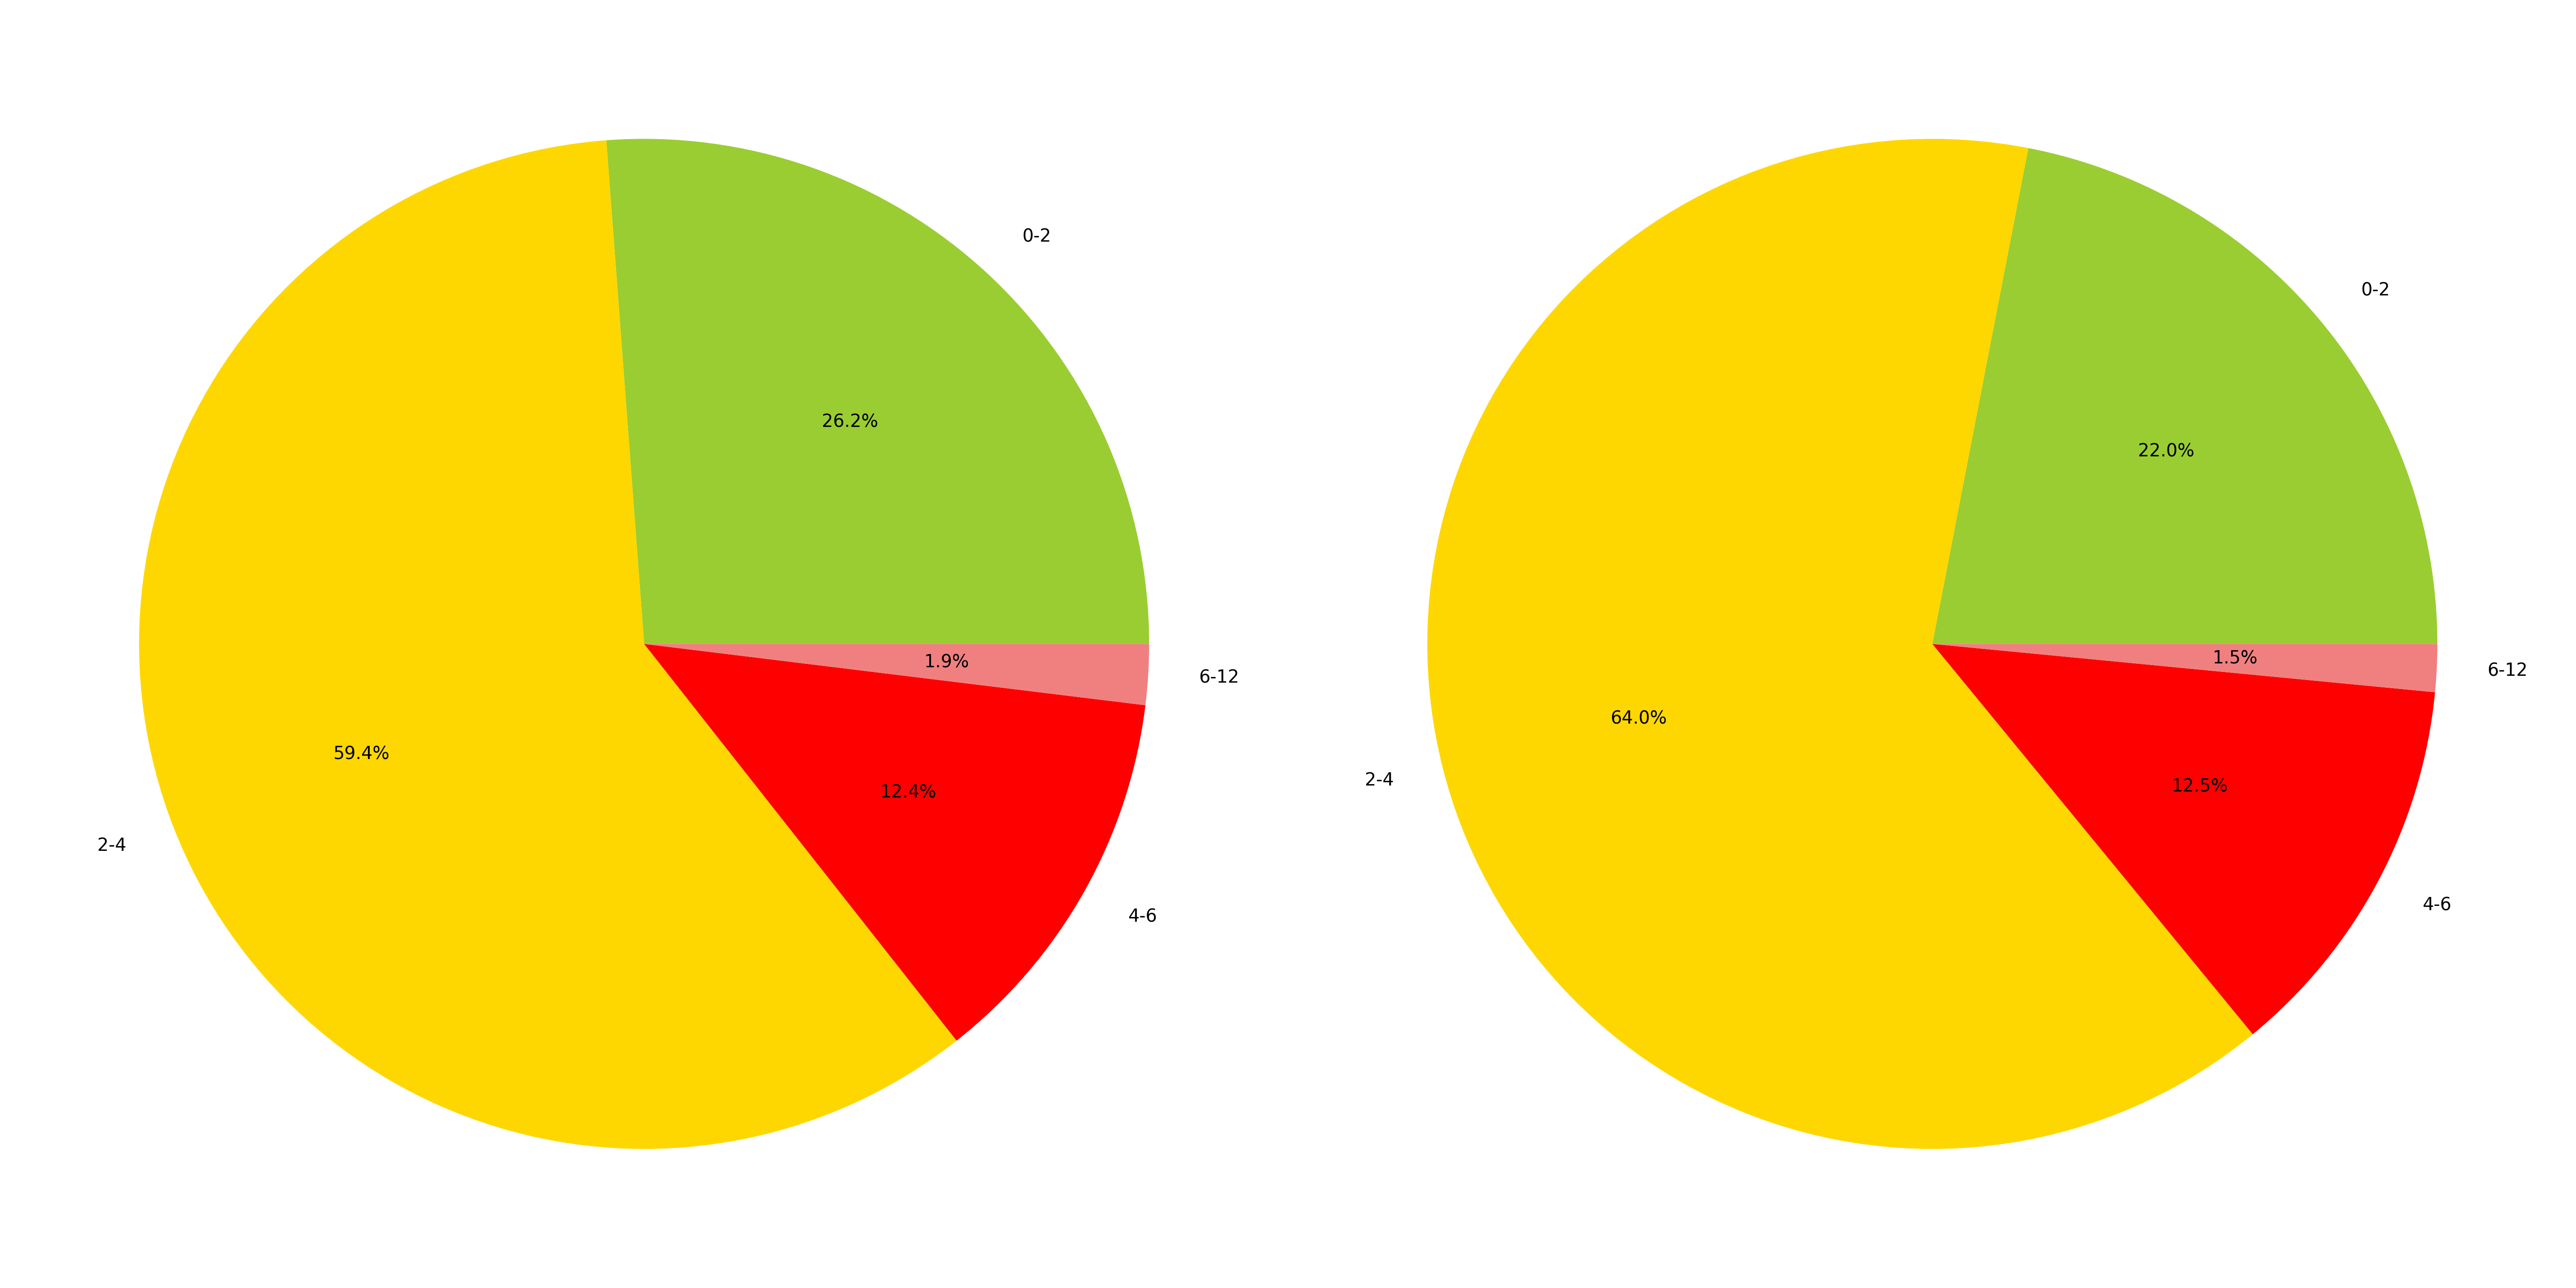

In [7]:
bins = [0,2,4,6,12]
for i in range(len(data_delay)):
       cut_delay = pd.cut(data_delay[i]['delay'],bins = bins,labels = range(4))
       count_delay = pd.value_counts(cut_delay)
       data_delay[i] = count_delay.sort_index()
       print('network',i,'delay_count')
       print(data_delay[i])

fig  = plt.figure(dpi=300, figsize=(20, 12), constrained_layout=True)
for i in range(len(data_delay)):
       ax = fig.add_subplot(1,2,i+1)
       data = data_delay[i]
       labels = ['0-2','2-4','4-6','6-12']
       colors = ['yellowgreen','gold','#FF0000','lightcoral']
       ax.pie(data,labels=labels, colors=colors,
              autopct='%1.1f%%')
plt.show()

In [8]:
rebuf1 = pd.read_csv(file_path+'rebuf1.csv')
rebuf2 = pd.read_csv(file_path+'rebuf2.csv')
rebuf1 = rebuf1[:92022]
rebuf2 = rebuf2[:92022]
print(rebuf2)
data_rebuf = [rebuf1,rebuf2]

          rebuf
0      0.091413
1      0.000180
2      0.000117
3      0.018758
4      0.004453
...         ...
88095  0.000000
88096  0.000000
88097  0.000000
88098  0.000000
88099  0.000000

[88100 rows x 1 columns]


rebuf_network  0  count: 1670
sum_rebuf_time 0  : rebuf    79.168287
dtype: float64
rebuf_network  1  count: 1723
sum_rebuf_time 1  : rebuf    123.529312
dtype: float64


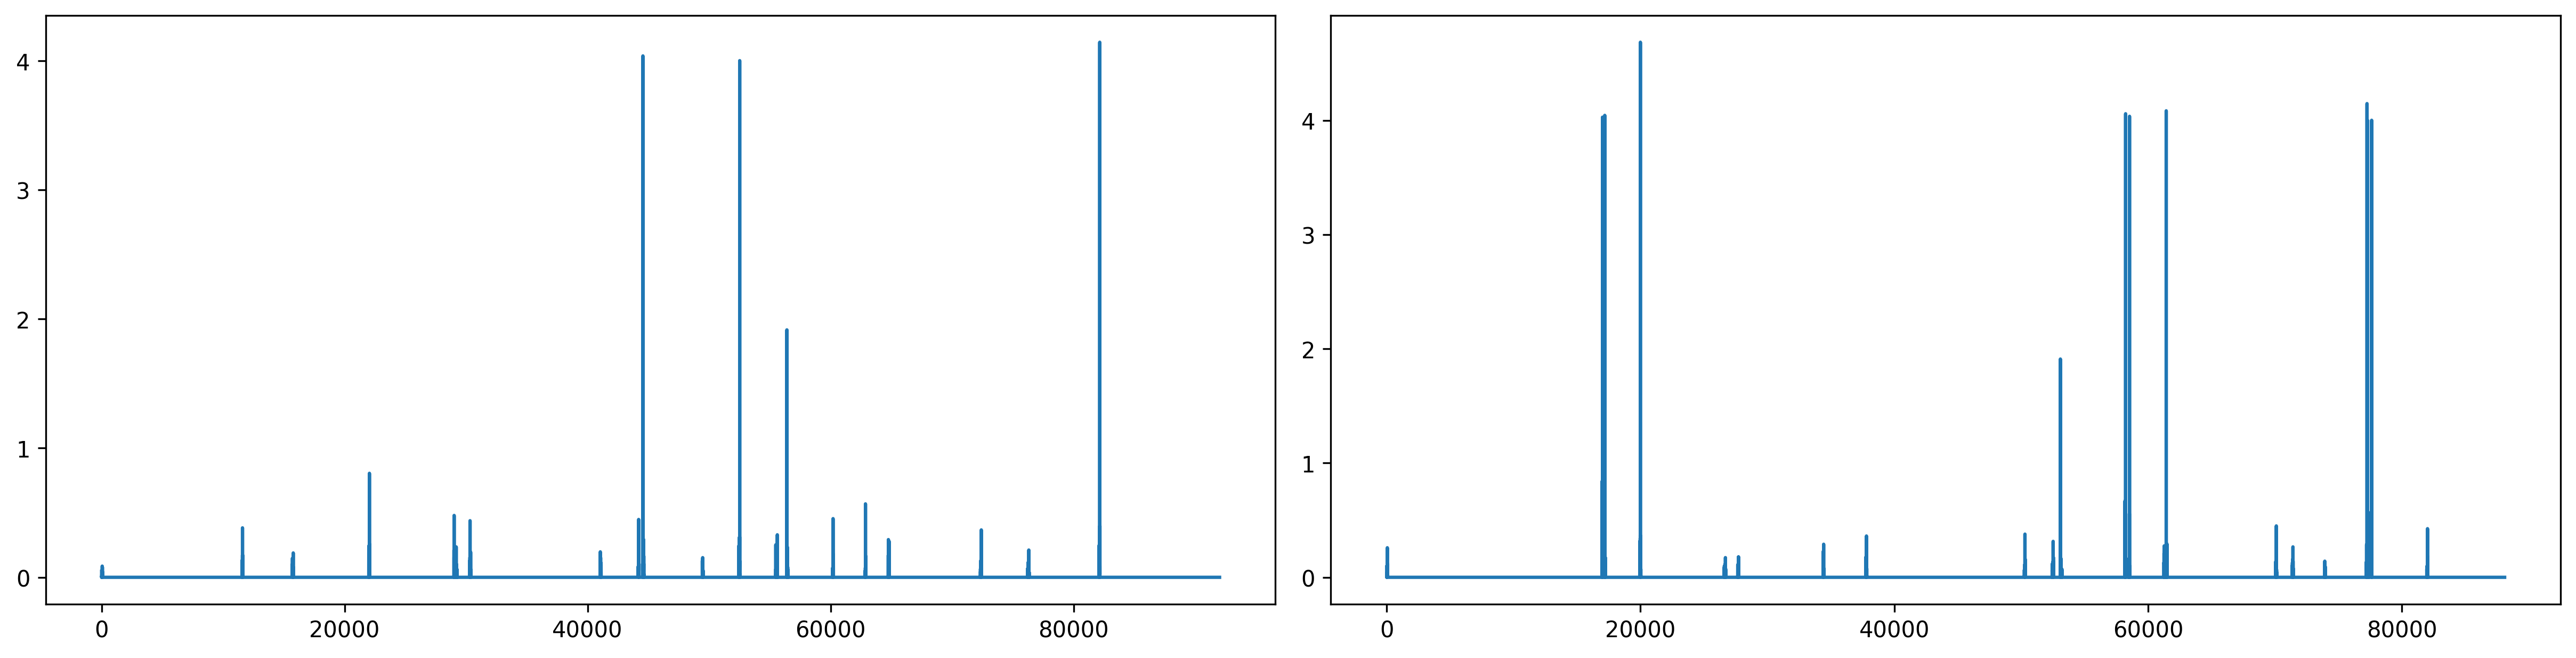

In [9]:
fig  = plt.figure(dpi=300, figsize=(16, 4), constrained_layout=True)
for i in range(len(data_rebuf)):
       ax = fig.add_subplot(1,2,i+1)
       data = data_rebuf[i]
       print('rebuf_network ',i,' count:',len(data[data['rebuf']>0]))
       print('sum_rebuf_time',i,' :',np.sum(data[data['rebuf']>0]))
       ax.plot(data)
plt.show()

In [10]:
bins = [0,1,2,3,5]
for i in range(len(data_rebuf)):
       cut_rebuf = pd.cut(data_rebuf[i]['rebuf'],bins = bins,labels = range(4))
       count_rebuf= pd.value_counts(cut_rebuf)
       data_rebuf[i] = count_rebuf.sort_index()
       print('rebuf_count_network',i)
       print(data_rebuf[i])

rebuf_count_network 0
0    1665
1       2
2       0
3       3
Name: rebuf, dtype: int64
rebuf_count_network 1
0    1712
1       2
2       0
3       9
Name: rebuf, dtype: int64


In [11]:
bufferSize1 = pd.read_csv(file_path+'buffer_size1.csv')
bufferSize2 = pd.read_csv(file_path+'buffer_size2.csv')
data_bufferSize = [bufferSize1,bufferSize2]

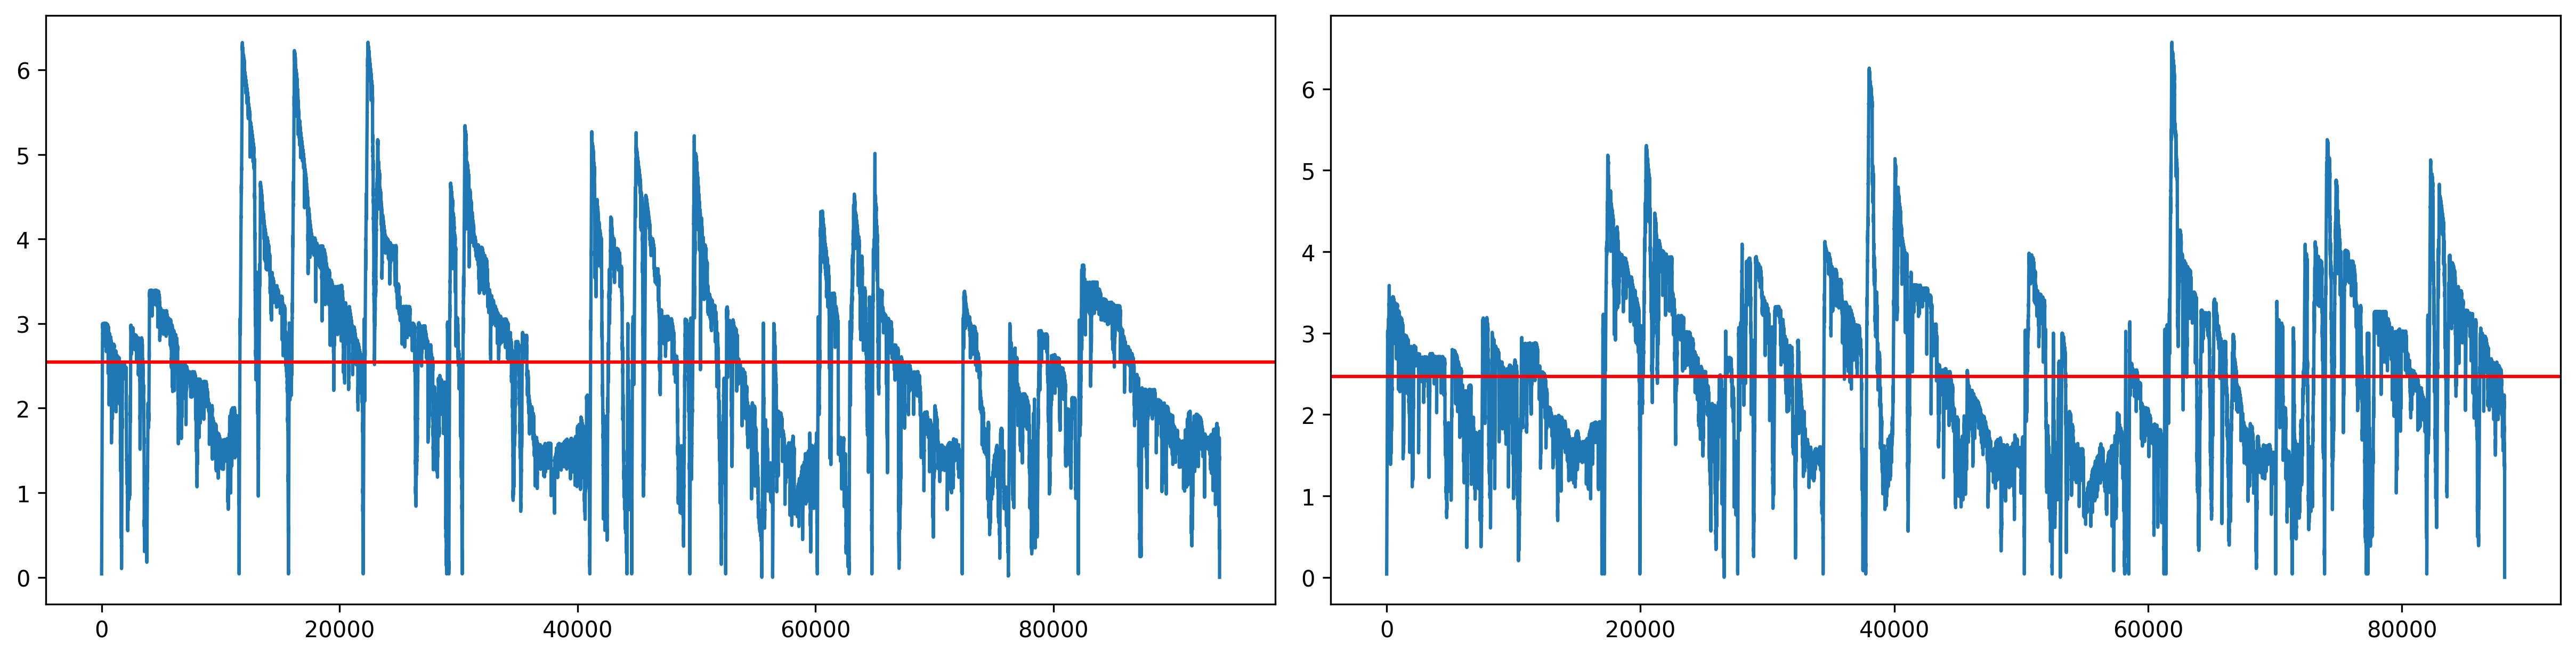

In [12]:
fig  = plt.figure(dpi=300, figsize=(16, 4), constrained_layout=True)
for i in range(len(data_bufferSize)):
       ax = fig.add_subplot(1,2,i+1)
       data = data_bufferSize[i]
       ax.plot(data)
       ax.axhline(np.average(data['buffer_size']),color = 'red')
plt.show()

In [16]:
bins = [0,0.4,1.4,7]
for i in range(len(data_bufferSize)):
       cut_delay = pd.cut(data_bufferSize[i]['buffer_size'],bins = bins,labels = range(3))
       count_delay = pd.value_counts(cut_delay)
       data_delay[i] = count_delay.sort_index()
       print('percentage_buffersize_count_network',i)
       print(data_delay[i]/sum(data_delay[i])*100)

percentage_buffersize_count_network 0
0     0.847106
1    13.076931
2    86.075963
Name: buffer_size, dtype: float64
percentage_buffersize_count_network 1
0     0.765066
1    12.939147
2    86.295788
Name: buffer_size, dtype: float64


In [18]:
data_model_with_lstm= pd.read_csv('./model_with_lstm/train.csv')
data_model_without_lstm= pd.read_csv('./model_without_lstm/train.csv')

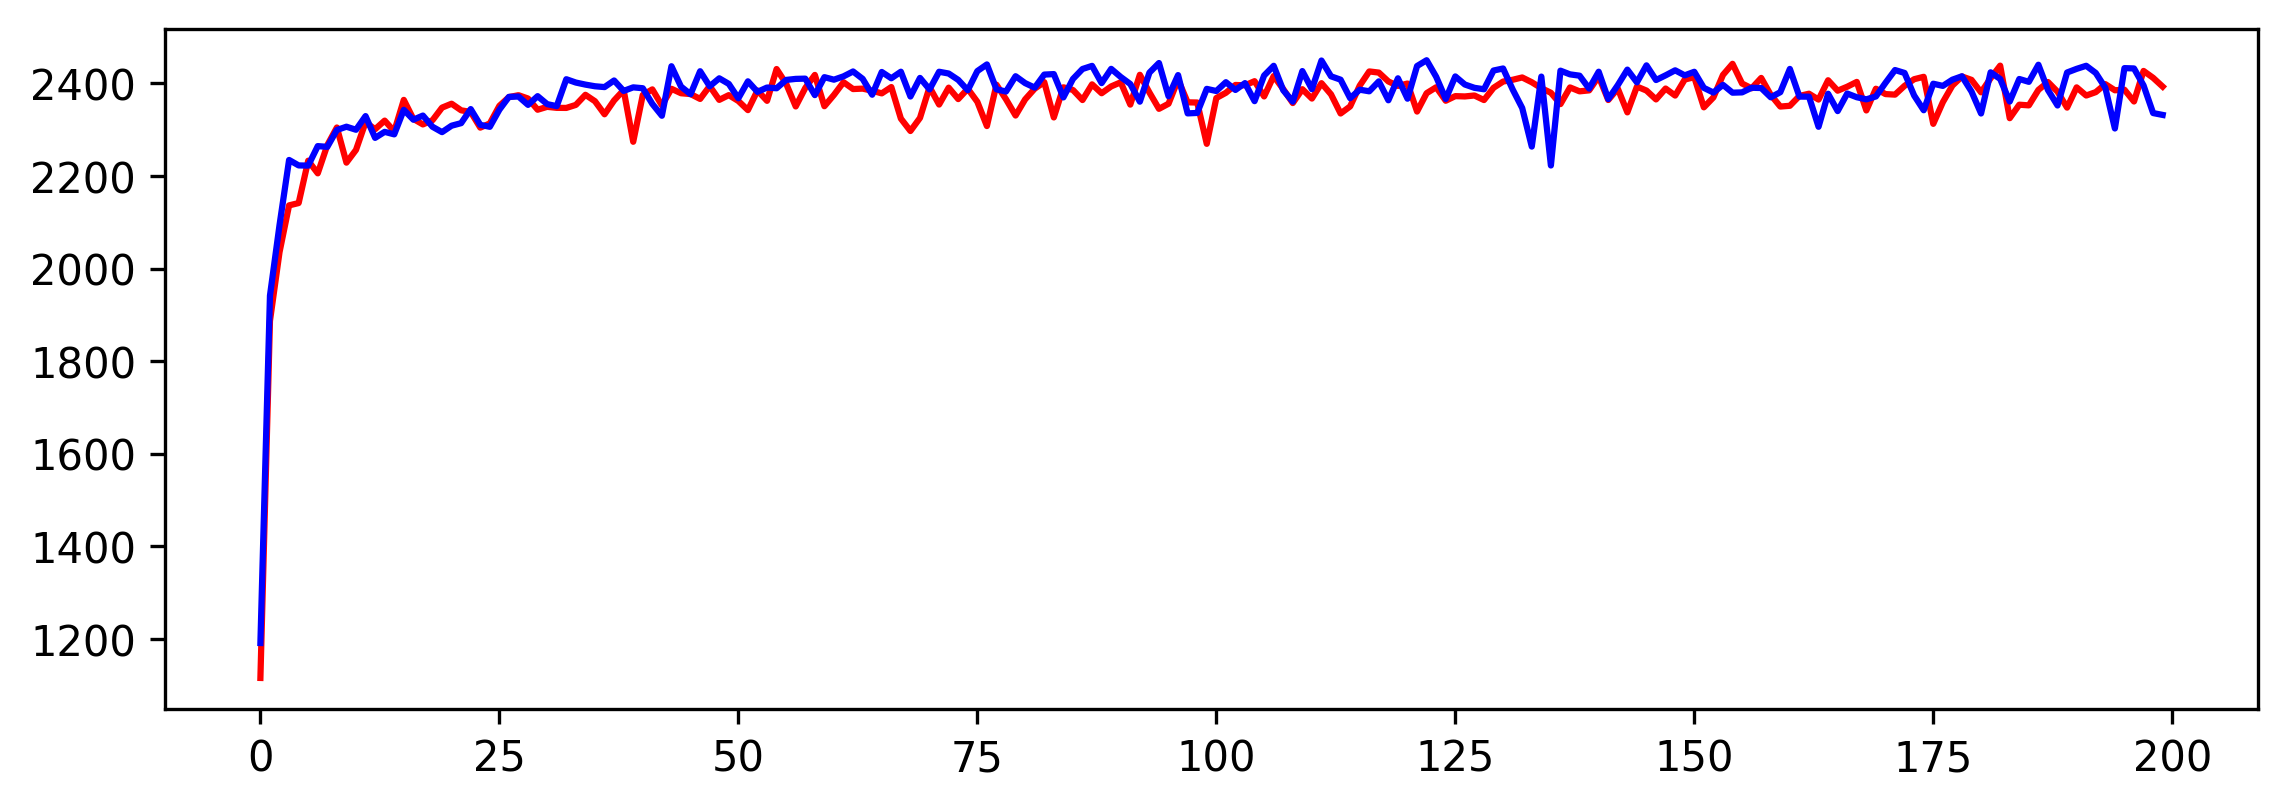

In [19]:
fig = plt.figure(dpi=300,figsize=(9,3))
ax = fig.add_subplot(111)
ax.plot(data_model_with_lstm['qoe'],color = 'red')
ax.plot(data_model_without_lstm['qoe'],color = 'blue')
plt.show()